In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("train.csv")
df_tmp=df.copy()

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df_tmp["Loan_Stats"]=[1 if x=='Y' else 0 for x in df_tmp["Loan_Status"]]
df_tmp=df_tmp.drop("Loan_Status", axis=1)
df_tmp=df_tmp.drop("Loan_ID", axis=1)

In [5]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+ "_is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label]=pd.Categorical(content).codes+1

In [6]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label]=pd.Categorical(content).codes+1

In [7]:
df_tmp.dtypes

Gender                            int8
Married                           int8
Dependents                        int8
Education                         int8
Self_Employed                     int8
ApplicantIncome                  int64
CoapplicantIncome              float64
LoanAmount                     float64
Loan_Amount_Term               float64
Credit_History                 float64
Property_Area                     int8
Loan_Stats                       int64
LoanAmount_is_missing             bool
Loan_Amount_Term_is_missing       bool
Credit_History_is_missing         bool
dtype: object

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df_tmp=df_tmp.drop("ApplicantIncome", axis=1)
df_tmp=df_tmp.drop("Self_Employed", axis=1)
df_tmp=df_tmp.drop("Dependents", axis=1)
df_tmp=df_tmp.drop("Loan_Amount_Term", axis=1)
df_tmp=df_tmp.drop("Gender", axis=1)

In [9]:
np.random.seed(10)
from sklearn.model_selection import train_test_split as tts
x=df_tmp.drop("Loan_Stats", axis=1).values
y=df_tmp["Loan_Stats"].values
x_train, x_valid, y_train, y_valid=tts(x,y,test_size=0.2, stratify=y)

In [11]:
df_tmp.corr()['Loan_Stats'].sort_values()

Education                     -0.085884
LoanAmount_is_missing         -0.077883
CoapplicantIncome             -0.059187
Loan_Amount_Term_is_missing   -0.038178
LoanAmount                    -0.033214
Loan_Amount_Term              -0.022549
Self_Employed                 -0.011332
ApplicantIncome               -0.004710
Dependents                     0.014263
Gender                         0.029040
Property_Area                  0.032112
Credit_History_is_missing      0.033849
Married                        0.075547
Credit_History                 0.540556
Loan_Stats                     1.000000
Name: Loan_Stats, dtype: float64

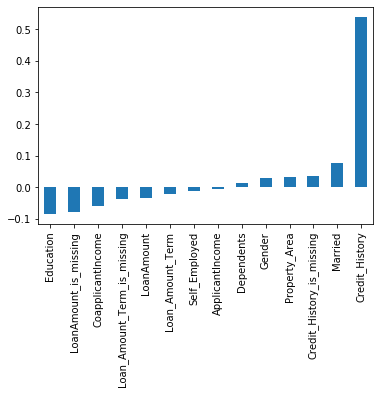

In [10]:
df_tmp.corr()['Loan_Stats'].sort_values().drop('Loan_Stats').plot(kind='bar')

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaledtrain_x = scaler.fit_transform(x_train)
scaledvalid_x = scaler.fit_transform(x_valid)

In [12]:
df_tmp.shape

(614, 12)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
model = Sequential()

model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(3, activation='elu'))
# model.add(Dropout(0.15))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=25)

In [55]:
model.fit(x=scaledtrain_x,
          y=y_train,
          epochs=400,
          validation_data=(scaledvalid_x, y_valid),
          callbacks=[early_stop])

Train on 491 samples, validate on 123 samples
Epoch 1/400
491/491 [==============================] - 1s 1ms/sample - loss: 0.9200 - accuracy: 0.3116 - val_loss: 0.8254 - val_accuracy: 0.3008
Epoch 2/400
491/491 [==============================] - 0s 93us/sample - loss: 0.8109 - accuracy: 0.2974 - val_loss: 0.7462 - val_accuracy: 0.3333
Epoch 3/400
491/491 [==============================] - 0s 108us/sample - loss: 0.7399 - accuracy: 0.3605 - val_loss: 0.6934 - val_accuracy: 0.5285
Epoch 4/400
491/491 [==============================] - 0s 87us/sample - loss: 0.6939 - accuracy: 0.5295 - val_loss: 0.6655 - val_accuracy: 0.6585
Epoch 5/400
491/491 [==============================] - 0s 83us/sample - loss: 0.6679 - accuracy: 0.6273 - val_loss: 0.6528 - val_accuracy: 0.6829
Epoch 6/400
491/491 [==============================] - 0s 88us/sample - loss: 0.6563 - accuracy: 0.6762 - val_loss: 0.6452 - val_accuracy: 0.6911
Epoch 7/400
491/491 [==============================] - 0s 104us/sample - loss:

Epoch 112/400
491/491 [==============================] - 0s 94us/sample - loss: 0.4624 - accuracy: 0.8065 - val_loss: 0.4810 - val_accuracy: 0.8211
Epoch 113/400
491/491 [==============================] - 0s 87us/sample - loss: 0.4619 - accuracy: 0.8065 - val_loss: 0.4802 - val_accuracy: 0.8211
Epoch 114/400
491/491 [==============================] - 0s 91us/sample - loss: 0.4640 - accuracy: 0.8065 - val_loss: 0.4803 - val_accuracy: 0.8211
Epoch 115/400
491/491 [==============================] - 0s 87us/sample - loss: 0.4658 - accuracy: 0.8065 - val_loss: 0.4796 - val_accuracy: 0.8130
Epoch 116/400
491/491 [==============================] - 0s 71us/sample - loss: 0.4615 - accuracy: 0.8065 - val_loss: 0.4816 - val_accuracy: 0.8211
Epoch 00116: early stopping


In [14]:
from tensorflow.keras.models import load_model

In [59]:
model.save('neuralnetwork.h5')

In [15]:
model=load_model('neuralnetwork.h5')

In [16]:
ypred=model.predict_classes(scaledvalid_x)

In [17]:
from sklearn.metrics import accuracy_score as acc

In [18]:
accuracy = acc(ypred, y_valid)

In [19]:
accuracy

0.8211382113821138

In [20]:
df_test=pd.read_csv("test.csv")
df_testcopy=df_test.copy()

In [22]:
df_testcopy=df_testcopy.drop("Loan_ID", axis=1)

In [23]:
for label, content in df_testcopy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_testcopy[label]=content.fillna(content.median())
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_testcopy[label]=pd.Categorical(content).codes+1

In [24]:
for label, content in df_testcopy.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_testcopy[label]=pd.Categorical(content).codes+1

In [25]:
scaledtest = scaler.fit_transform(df_testcopy)

In [26]:
preds=model.predict_classes(scaledtest)

In [27]:
df_preds=pd.DataFrame()
df_preds["Loan_ID"]=df_test["Loan_ID"]
df_preds["Loan_stats"]=preds
df_preds

,Loan_ID,Loan_stats
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [28]:
df_preds["Loan_Status"]=['Y' if x==1 else 'N' for x in df_preds["Loan_stats"]]
df_preds=df_preds.drop("Loan_stats", axis=1)
df_preds

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [29]:
df_preds.to_csv("Neuralnetwork.csv", index= False)